Dependecies: Add your Dependencies here

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10

Read the dataset from the CSV file

In [212]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.read_csv('/content/credit_scoring_sample.csv')
data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


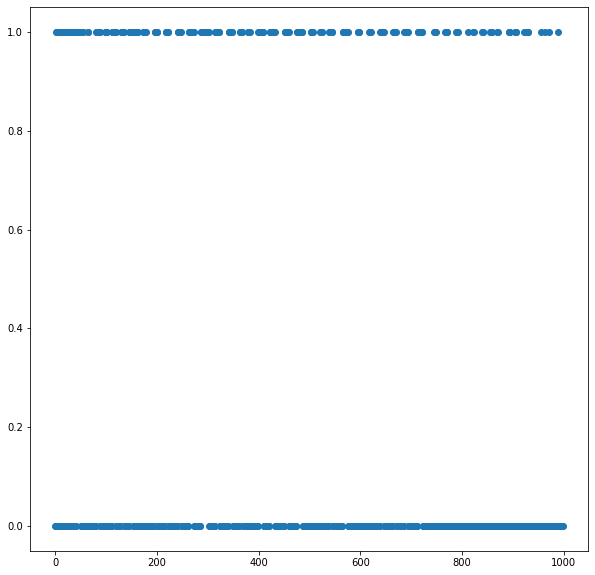

In [213]:
plt.scatter(data.index , data['Serious_Dlq_in_2yrs'])

plt.show()

In [214]:
# Handle the NaN values
data.fillna(data.mean(), inplace=True)
data.isna().sum()

Serious_Dlq_in_2yrs                   0
Debt_Ratio                            0
age                                   0
Number_Of_Time_30-59_Days_Past_Due    0
Number_Of_Time_60-89_Days_Past_Due    0
Number_Of_Times_90_Days_Late          0
Monthly_Income                        0
Dependents                            0
dtype: int64

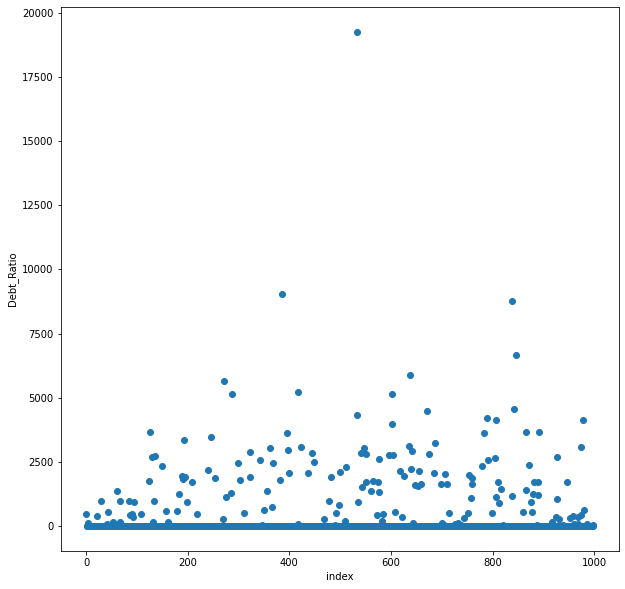

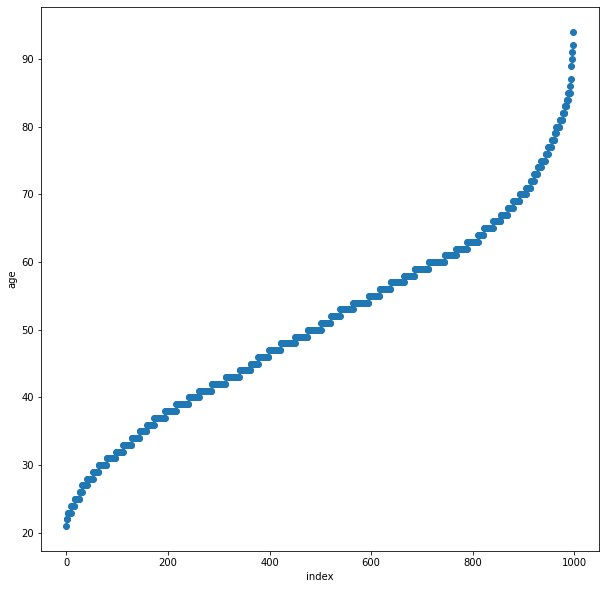

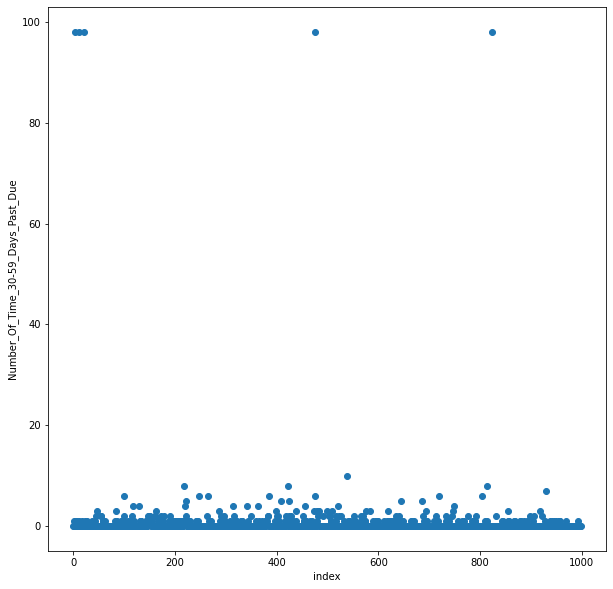

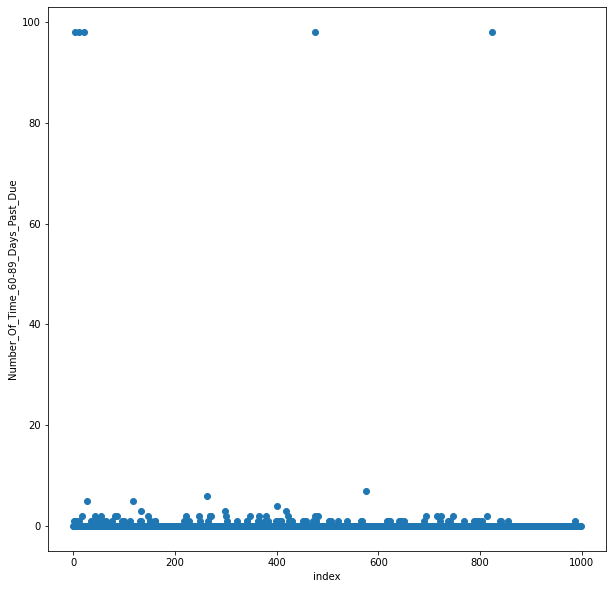

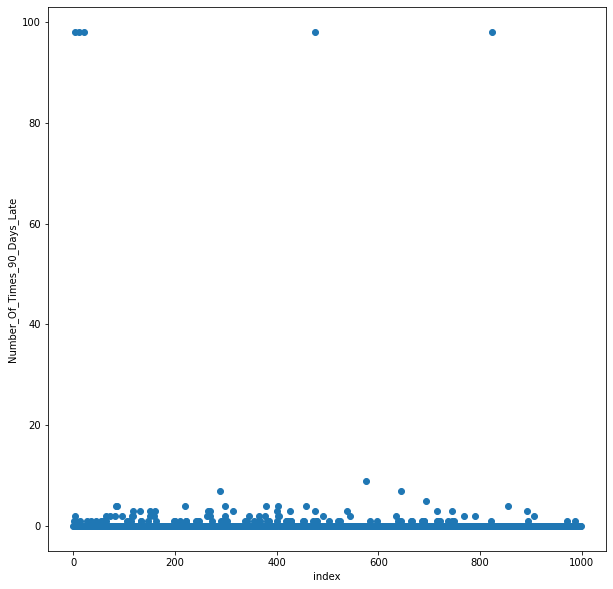

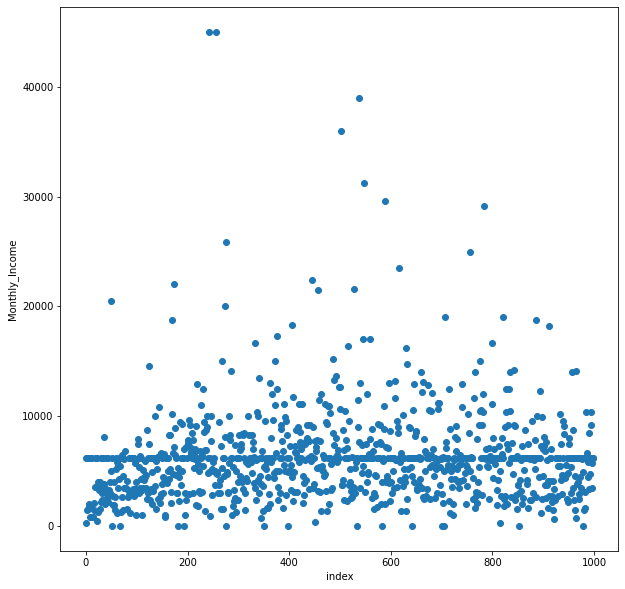

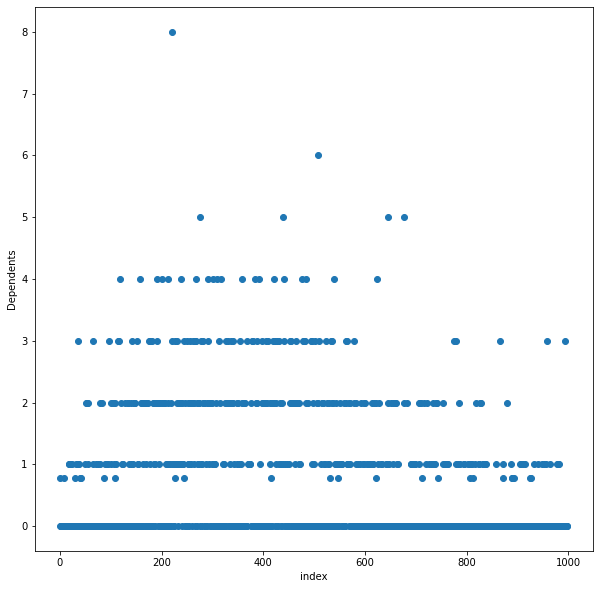

In [215]:
# Visualize the distribution of data for every feature
for x in data.columns:
  if x != "Serious_Dlq_in_2yrs":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(data.index,data[x])
    plt.show()
    print('\n')

Train the Random Forest Classifier

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [217]:
# seperate depedendent and independent variables from the dataset
X = data.iloc[:,1:].values #indep.
y = data.iloc[:,0:1].values #dep.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [218]:
f = data.columns
f[1:]

Index(['Debt_Ratio', 'age', 'Number_Of_Time_30-59_Days_Past_Due',
       'Number_Of_Time_60-89_Days_Past_Due', 'Number_Of_Times_90_Days_Late',
       'Monthly_Income', 'Dependents'],
      dtype='object')

In [219]:
# define paramerts for the random forest
parameters = {'max_features': [1, 2, 4], 'max_depth': [2,3,4,5]}
rf = RandomForestClassifier(n_estimators=100)

In [220]:
print(y)

[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]


In [221]:
# perform cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [222]:
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train, y_train.ravel()) 

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 2}


In [223]:
#Get the best score from the grid search
print(grid_search.best_score_) 

0.8194986914865716


In [224]:
clf = grid_search.best_estimator_
clf.fit(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
clf.score(X_test,y_test)

0.8606060606060606

In [226]:
a = clf.predict(X_test[2:3,:])

print(a, y_test[2:3,:])

[0] [[0]]


In [228]:
grid_search.cv_results_

{'mean_fit_time': array([0.2589694 , 0.26428123, 0.27370114, 0.26619763, 0.26002707,
        0.30367823, 0.29265895, 0.28468132, 0.28838458, 0.2729382 ,
        0.28958859, 0.29421206]),
 'mean_score_time': array([0.01827283, 0.0199626 , 0.02059727, 0.02100487, 0.01873693,
        0.02043066, 0.02276006, 0.01861563, 0.01843743, 0.02040939,
        0.02233906, 0.01644263]),
 'mean_test_score': array([0.81475028, 0.81944971, 0.81559115, 0.81870622, 0.8180199 ,
        0.81232596, 0.81385788, 0.81528121, 0.80735452, 0.80844496,
        0.81949869, 0.81115197]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

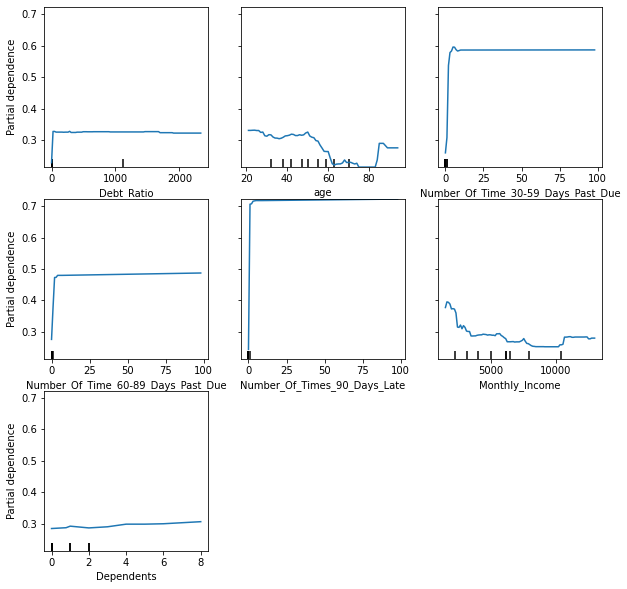

In [229]:
# Find the feature which has the weakest impact in Random Forest Model
from sklearn.inspection import plot_partial_dependence
features = [0,1,2,3,4,5,6]
plot_partial_dependence(clf,X,features,feature_names= f[1:])

In [230]:
# Perform bagging classification using decision trees as the base classifier

In [231]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [232]:
# get a list of models to evaluate
def get_models():
	# write your code here
  models = dict()
	
  n_trees = [2,3,4 ]
  for n in n_trees:
    models[str(n)] = BaggingClassifier(n_estimators=n)
  return models

In [233]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores


In [234]:
# Summarize the performance by getting mean and standard deviation of scores
models = get_models()
final_acc = []
final_std = []
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  # evaluate the model
  scores = evaluate_model(model, X, y)
  # store the results
  results.append(scores)
  names.append(name)
  m=mean(scores)
  s=std(scores)
  final_acc.append(m)
  final_std.append(s)
  # summarize the performance along the way
  print('->for %s trees mean : %.3f standard deviation : %.3f' % (name, m, s))

->for 2 trees mean : 0.749 standard deviation : 0.034
->for 3 trees mean : 0.751 standard deviation : 0.039
->for 4 trees mean : 0.765 standard deviation : 0.026


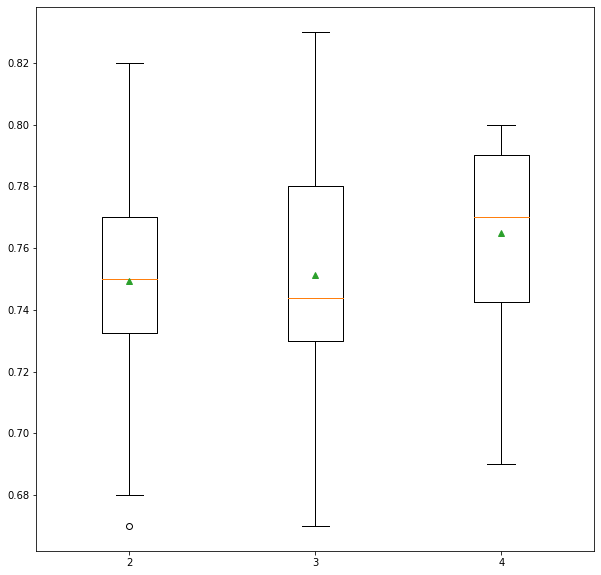

In [235]:
# Plot the model performance for comparison using boxplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [236]:
# Compare the best performance of bagging with random forest
print("Accuracy of Random Forest Model : %.3f" % clf.score(X_test,y_test) )
print("Accuracy of Best model of Bagging : %.3f" %  max(final_acc))



Accuracy of Random Forest Model : 0.861
Accuracy of Best model of Bagging : 0.765


References:-


*   [Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://https://https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)









